In [1]:
## Plot curves

In [2]:
## Set date of phenotype data for use here
filedate = 'Jan82019'

In [3]:
## Bring in needed mods
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
## Bring in mod, seaborn
import seaborn as sns
sns.set(font_scale=1)
## Set tick style
sns.set(style="ticks", context="talk")
plt.style.use(['tableau-colorblind10'])

In [5]:
## set path to file, should end in, "curation_baselined_median21.csv'
file_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median51.csv'%(
    filedate)

In [6]:
## Bring in median filtered data
df = pd.read_csv(file_path,index_col=0)

In [7]:
df.head()

,date,row,column,plate,temp,strain,amphB,length,Instrument,saturatedOD,...,249300s,250201s,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s
0,Sep182017,e,7,2,30,SS-A837,0.0,72,Loaner,1.4500,...,1.4098,1.4098,1.4098,1.4098,1.4098,1.4098,1.4098,1.4098,1.4098,1.4098
1,Nov12017,e,7,2,30,SS-A837,0.0,72,Moon,1.4392,...,1.4162,1.4162,1.4172,1.4172,1.4172,1.4172,1.4172,1.4172,1.4182,1.4182
2,Nov82017,e,7,2,30,SS-A837,0.0,72,Moon,1.4800,...,1.4158,1.4158,1.4168,1.4168,1.4168,1.4178,1.4178,1.4188,1.4188,1.4188
3,Feb212018,e,7,2,30,SS-A837,0.0,72,Moon,1.6927,...,1.4262,1.4262,1.4262,1.4272,1.4272,1.4272,1.4272,1.4272,1.4272,1.4272
4,Sep182017,b,2,2,30,SS-B307,0.0,72,Loaner,1.5400,...,0.9580,0.9590,0.9590,0.9590,0.9590,0.9610,0.9610,0.9620,0.9620,0.9620


In [8]:
## gather column names
dfcols = df.columns.tolist()

In [9]:
## gather time starting index
tix = dfcols.index('0s')

In [10]:
## gather time points
tpts = dfcols[tix:]

In [11]:
## gather info columns
infos = dfcols[:tix]

In [12]:
## Who are our unique strian names
strains = df.strain.unique()

In [13]:
len(strains)

119

In [14]:
## Set parental strains
parental_strains = ['XL280a','XL280alpha','SS-A837']

In [15]:
## Gather unique conditions
unicon = df[['temp','amphB']].drop_duplicates(
).sort_values(by=['temp','amphB']).reset_index(drop=True).copy()

In [16]:
## Check our work
unicon.tail()

,temp,amphB
7,37,0.175
8,38,0.000
9,39,0.000
10,39,0.075
11,39,0.125


In [17]:
unicon.drop(8,inplace=True)

In [18]:
## Make array of time in hours
time_hrs = [round(int(a[:-1])/float(60**2),3) for a in tpts]

In [19]:
## Take only the segregants
segregants = [s for s in strains if s not in parental_strains]

In [20]:
## Set colors
colors = ['tab:blue','tab:blue','tab:orange'] 

In [21]:
## Set line styles 
liness = ['--','-','-']

In [22]:
## Path to save median growth curve 
matrix_growth_median_path = '../FIGURES/'+file_path.split('/'
                        )[-1].split('.csv')[0]+'_growth_curve_median.png'

In [23]:
## Path to save mean growth curve
matrix_growth_mean_path = '../FIGURES/'+file_path.split('/'
                        )[-1].split('.csv')[0]+'_growth_curve_mean.png'

In [24]:
## Set coloring and background
#plt.style.use(['dark_background',
#              'tableau-colorblind10'])
plt.style.use(['tableau-colorblind10'])

In [25]:
## Set the dpi for saving
mydpi = 100

In [26]:
## Make a plotting map! 
plotmap = pd.DataFrame([unicon.temp.unique().tolist() + 
                        unicon.amphB.unique().tolist(),
                        list(np.arange(len(unicon.temp.unique()))) + 
                       list(np.arange(len(unicon.amphB.unique())))],
                      index = ['C','I']).T

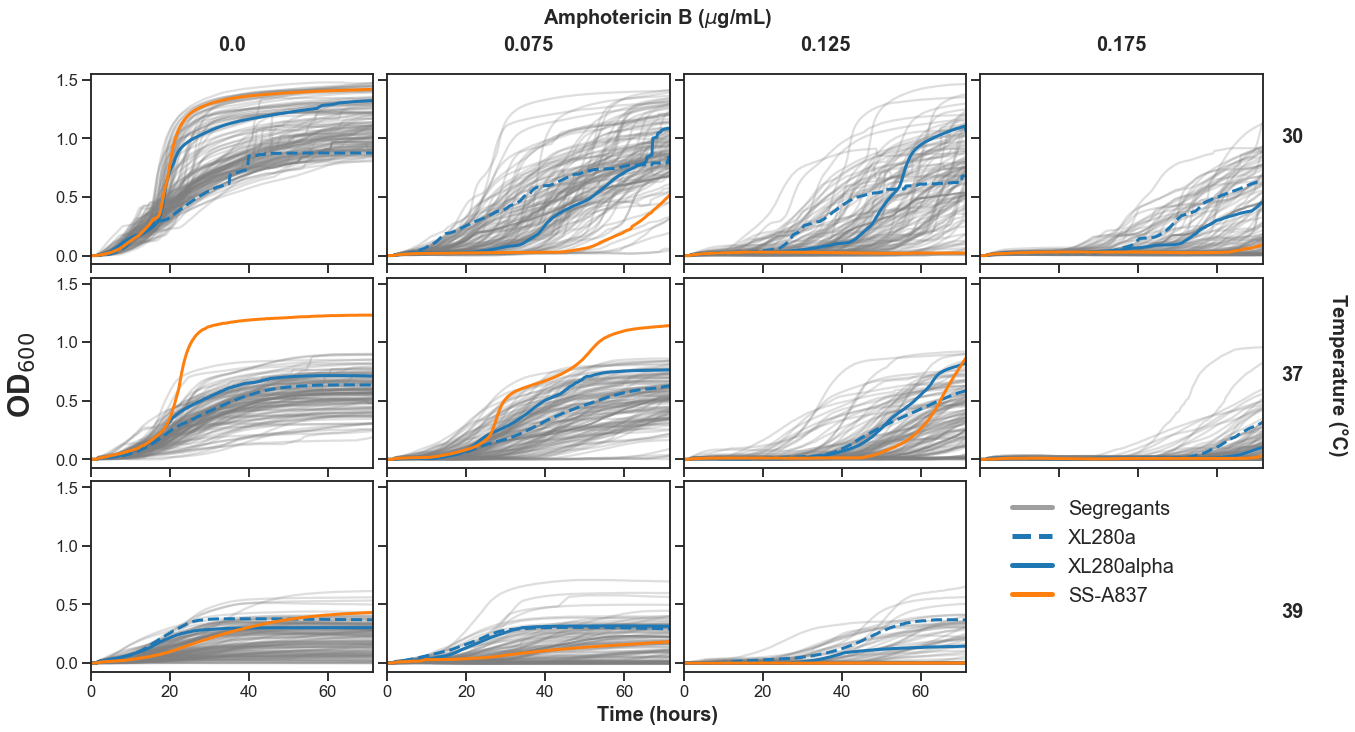

In [27]:
## Make figure of growth curves drug x temp, taking the median across segregants' curves
fig, ax = plt.subplots(len(unicon.temp.unique()),
                       len(unicon.amphB.unique()),
                       figsize=(21,11),
                       sharex=True,sharey=True)
for i, row in unicon.iterrows():
    plt.sca(ax[int(plotmap[(plotmap.C==row.temp)]['I']),
               int(plotmap[(plotmap.C==row.amphB)]['I'])]);
    for k,s in enumerate(segregants):
        if k == 0:
            plt.plot(time_hrs,
             df[(df.strain==s)& 
                (df.temp==row.temp) & 
                (df.amphB==row.amphB)][tpts].median().values,
                     color='tab:gray',
                     alpha=0.75,label='Segregants');
        else:
            plt.plot(time_hrs,
             df[(df.strain==s)& 
                (df.temp==row.temp) & 
                (df.amphB==row.amphB)][tpts].median().values,
                 color='tab:gray',alpha=0.25);
    for j,s in enumerate(parental_strains):
        plt.plot(time_hrs,
         df[(df.strain==s)& 
            (df.temp==row.temp) & 
            (df.amphB==row.amphB)][tpts].median().values,
                 color=colors[j],linestyle=liness[j],
                 linewidth=3,label=s);
        
fig.text(0.5,0.07,'Time (hours)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.08,0.5,"OD" + "$_{600}$",
         fontsize=30,va='center',ha='center',
         rotation=90,fontweight='bold')

fig.text(0.5,.95,'Amphotericin B (' + '${\mu}$'+ 'g/mL)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.95,0.5,u'Temperature (°C)',
         rotation=270,
         fontsize=20,va='center',
         ha='center',fontweight='bold')
plt.xlim(0,np.max(time_hrs))              
for j in [3]:
    ax[-1,j].axis('off')
    
for i,d in enumerate(unicon.amphB.unique()):
    plt.sca(ax[0,i])
    plt.title('%s'%(d),
              ha='center',va='center',
              fontsize=20,fontweight='bold',
              y = 1.12);
             
label_place = np.linspace(0.2,.8,len(unicon.temp.unique()))
for i,t in enumerate(sorted(unicon.temp.unique())):
    fig.text(0.92,1 - label_place[i],str(t), #u'%s C°'%(t),
              ha='center',va='center',
              fontsize=20,fontweight='bold');

plt.sca(ax[-1,-2]);
leg = plt.legend(bbox_to_anchor=(1.1,1),fontsize=20);
leg.get_frame().set_linewidth(0.0);
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
    
plt.subplots_adjust(wspace=0.05,hspace=0.07);
if matrix_growth_median_path is not None:
    fig.savefig(matrix_growth_median_path,
                dpi=mydpi,bbox_inches='tight');

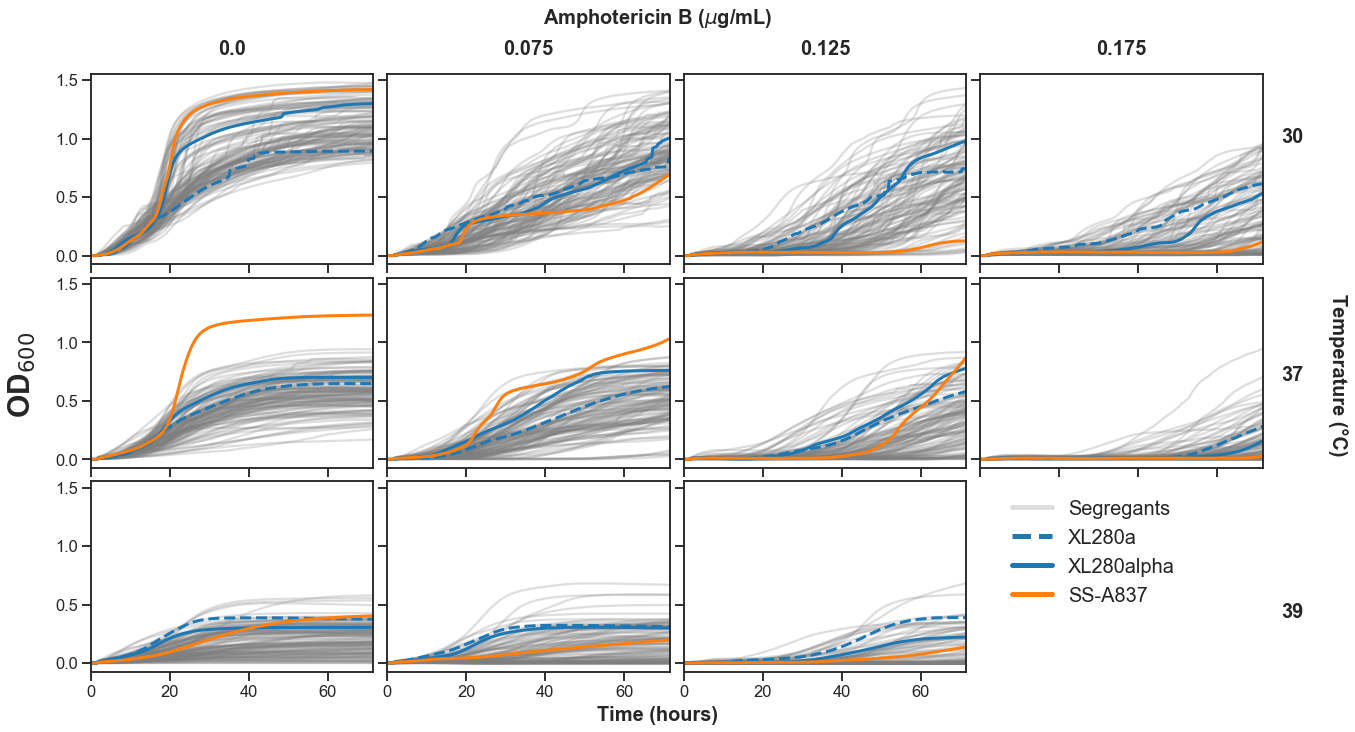

In [28]:
## Make figure of growth curves drug x temp taking the mean across segregants
fig, ax = plt.subplots(len(unicon.temp.unique()),
                       len(unicon.amphB.unique()),
                       figsize=(21,11),
                       sharex=True,sharey=True)
for i, row in unicon.iterrows():
    plt.sca(ax[int(plotmap[(plotmap.C==row.temp)]['I']),
               int(plotmap[(plotmap.C==row.amphB)]['I'])]);
    for k,s in enumerate(segregants):
        if k == 0:
            plt.plot(time_hrs,
             df[(df.strain==s)& 
                (df.temp==row.temp) & 
                (df.amphB==row.amphB)][tpts].mean().values,
                     color='tab:grey',alpha=0.25,
                     label='Segregants');
        else:
            plt.plot(time_hrs,
             df[(df.strain==s)& 
                (df.temp==row.temp) & 
                (df.amphB==row.amphB)][tpts].mean().values,
                 color='tab:grey',alpha=0.25);
            
    for j,s in enumerate(parental_strains):
        plt.plot(time_hrs,
         df[(df.strain==s)& 
            (df.temp==row.temp) & 
            (df.amphB==row.amphB)][tpts].mean().values,
                 color=colors[j],linestyle=liness[j],
                 linewidth=3,label=s);
plt.xlim(0,np.max(time_hrs))        
for j in [3]:
    ax[-1,j].axis('off')
   
for i,d in enumerate(unicon.amphB.unique()):
    plt.sca(ax[0,i])
    plt.title('%s'%(d),
              ha='center',va='center',
              fontsize=20,fontweight='bold', 
              y=1.1);

label_place = np.linspace(0.2,.8,len(unicon.temp.unique()))
for i,t in enumerate(sorted(unicon.temp.unique())):
    fig.text(0.92,1 - label_place[i],'%s'%(t),
              ha='center',va='center',
              fontsize=20,fontweight='bold');
    
        
fig.text(0.5,0.07,'Time (hours)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.08,0.5,"OD" + "$_{600}$",
         fontsize=30,va='center',ha='center',
         rotation=90,fontweight='bold')

fig.text(0.5,.95,'Amphotericin B (' + '${\mu}$'+ 'g/mL)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.95,0.5,u'Temperature (°C)',
         rotation=270,
         fontsize=20,va='center',
         ha='center',fontweight='bold')

plt.sca(ax[-1,-2]);
leg = plt.legend(bbox_to_anchor=(1.1,1),fontsize=20);
leg.get_frame().set_linewidth(0.0);
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
    
plt.subplots_adjust(wspace=0.05,hspace=0.07);
if matrix_growth_mean_path is not None:
    fig.savefig(matrix_growth_mean_path,
                dpi=mydpi,bbox_inches='tight');

In [29]:
unicon_2 = unicon.loc[[0,2,4,6]]

In [30]:
unicon_2

,temp,amphB
0,30,0.000
2,30,0.125
4,37,0.000
6,37,0.125


In [31]:
plotmap_2 = pd.DataFrame([[30,37,0.0,0.125],[0,1,0,1]],index=['C','I']).T

In [32]:
plotmap_2

,C,I
0,30.000,0.0
1,37.000,1.0
2,0.000,0.0
3,0.125,1.0


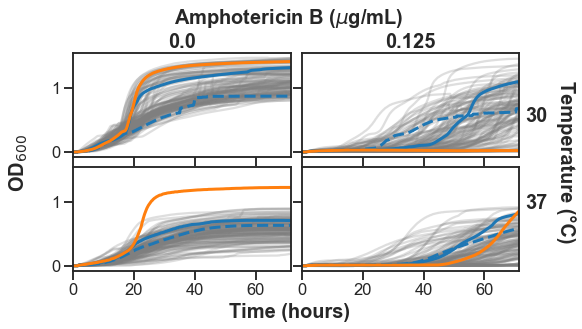

In [33]:
## Make figure of growth curves drug x temp taking the mean across segregants
fig, ax = plt.subplots(len(unicon_2.temp.unique()),
                       len(unicon_2.amphB.unique()),
                       figsize=(8,4),
                       sharex=True,sharey=True)
for i, row in unicon_2.iterrows():
    plt.sca(ax[int(plotmap_2[(plotmap_2.C==row.temp)]['I']),
               int(plotmap_2[(plotmap_2.C==row.amphB)]['I'])]);
    for k,s in enumerate(segregants):
        if k == 0:
            plt.plot(time_hrs,
             df[(df.strain==s)& 
                (df.temp==row.temp) & 
                (df.amphB==row.amphB)][tpts].median().values,
                     color='tab:grey',alpha=0.25,
                     label='Segregants');
        else:
            plt.plot(time_hrs,
             df[(df.strain==s)& 
                (df.temp==row.temp) & 
                (df.amphB==row.amphB)][tpts].median().values,
                 color='tab:grey',alpha=0.25);
            
    for j,s in enumerate(parental_strains):
        plt.plot(time_hrs,
         df[(df.strain==s)& 
            (df.temp==row.temp) & 
            (df.amphB==row.amphB)][tpts].median().values,
                 color=colors[j],linestyle=liness[j],
                 linewidth=3,label=s);
    
for i,d in enumerate(unicon_2.amphB.unique()):
    plt.sca(ax[0,i])
    plt.title('%s'%(d),
              ha='center',va='center',
              fontsize=20,fontweight='bold', 
              y=1.05);

label_place = np.linspace(0.2,.8,len(unicon_2.temp.unique()))
for i,t in enumerate(sorted(unicon_2.temp.unique())):
    fig.text(.93,0.66-(0.3*i),u'%s'%(t),
             ha='center',va='center',
              fontsize=20,fontweight='bold');
    
fig.text(0.5,-0.02,'Time (hours)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.5,1,'Amphotericin B (' + '${\mu}$'+ 'g/mL)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(.98,0.5,u'Temperature (°C)',
         fontsize=20,va='center',ha='center',
         rotation=270,fontweight='bold');

fig.text(0.03,0.5,'OD'+ '$_{600}$',
         fontsize=20,va='center',ha='center',
         rotation=90,fontweight='bold');
plt.xlim(0,np.max(time_hrs))
plt.subplots_adjust(wspace=0.05,hspace=0.1);
fig.savefig('/Users/croth/Desktop/CROTH_Dissertation_Description/growth_curves.png',
           dpi=100,bbox_inches='tight');

In [47]:
tdf = df[(df.temp==30) & (df.amphB==0.0)]
maxOD30_0 = pd.concat([tdf['strain'],tdf[tpts].max(axis=1)],axis=1)
maxOD30_0.columns = ['strain','mOD']

In [48]:
maxOD30_0.groupby('strain').agg('mean')

,mOD
strain,
SS-A837,1.418500
SS-B307,0.952850
SS-B308,1.099050
SS-B310,0.918300
SS-B311,1.043300
SS-B312,0.819365
SS-B313,1.192100
SS-B314,0.959100
SS-B315,1.097200


In [35]:
## Investigating mild stress -> grows better effect 
## We need to remove any "batched" samples and re make the plots above. 
## Set path
dates_path = '../FILES/Tecan_qtlruns_%s_dates.csv'%(filedate)

In [36]:
## Bring in the dates dataframe with info on batch effects
dates = pd.read_csv(dates_path,index_col=0)

In [37]:
## Get gates prior to batch effect
nbd = dates[(dates.batched==0)]['date'].tolist()

In [38]:
## Take the data with only those dates in this date list
dfn = df[(df.date.isin(nbd))]

In [39]:
## What is its shape?
dfn.shape

(2760, 298)

In [40]:
SS_a837 = pd.merge(df[(df.strain=='SS-A837')],dates[['date','batched']])

In [41]:
## Bring in needed mod
from collections import OrderedDict

In [42]:
SS_a837[(SS_a837.temp==30) & (SS_a837.amphB==0.075)]

,date,row,column,plate,temp,strain,amphB,length,Instrument,saturatedOD,...,250201s,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s,batched
8,Dec152017,e,7,2,30,SS-A837,0.075,72,Moon,1.2360,...,0.3278,0.3338,0.3388,0.3458,0.3528,0.3598,0.3678,0.3758,0.3848,0
10,Feb62018,e,7,2,30,SS-A837,0.075,72,Sunrise,1.3544,...,0.2572,0.2712,0.2812,0.2852,0.2902,0.3012,0.3072,0.3132,0.3222,0
12,Feb152018,e,7,2,30,SS-A837,0.075,72,Moon,1.6324,...,0.5690,0.5810,0.5930,0.6020,0.6120,0.6200,0.6290,0.6370,0.6480,1
14,Mar112018,e,7,2,30,SS-A837,0.075,72,Moon,1.7291,...,1.4312,1.4312,1.4312,1.4312,1.4312,1.4312,1.4312,1.4312,1.4312,1


In [43]:
SS_xa =  pd.merge(df[(df.strain=='XL280a')],dates[['date','batched']])

In [44]:
SS_xalpha =  pd.merge(df[(df.strain=='XL280alpha')],dates[['date','batched']])

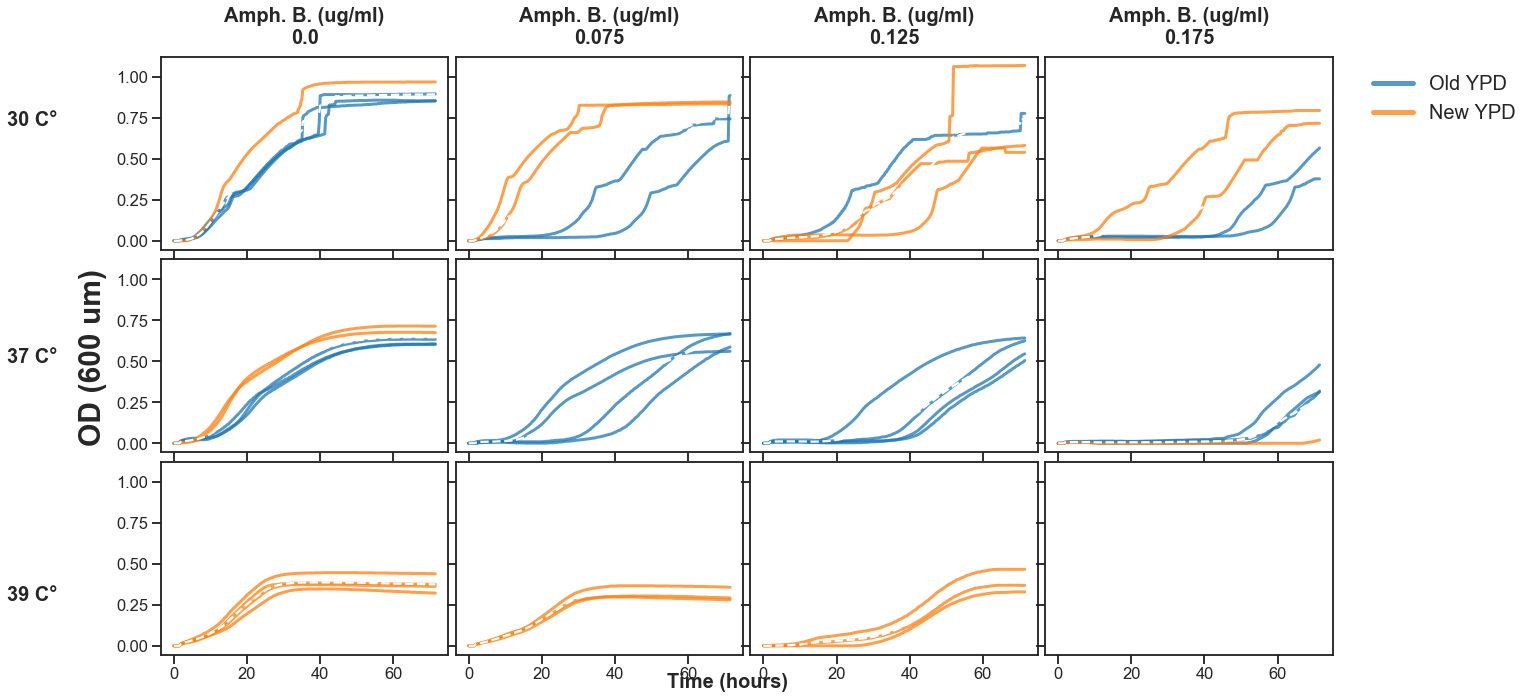

In [45]:
## Make figure of SS-A837 growth curves drug x temp taking the mean across segregants
fig, ax = plt.subplots(len(unicon.temp.unique()),
                       len(unicon.amphB.unique()),
                       figsize=(21,11),
                       sharex=True,sharey=True)

for i, row in unicon.iterrows():
    plt.sca(ax[int(plotmap[(plotmap.C==row.temp)]['I']),
               int(plotmap[(plotmap.C==row.amphB)]['I'])]);
    temp = SS_xa[(SS_xa.temp==row.temp) & 
            (SS_xa.amphB==row.amphB) & 
            (SS_xa.batched==0)][tpts]
    if temp.shape[0] > 0:
        plt.plot(time_hrs,temp.T.values,
                 color='tab:blue',alpha=0.75,
                 linewidth=3,label='Old YPD')
    temp = SS_xa[(SS_xa.temp==row.temp) & 
            (SS_xa.amphB==row.amphB) & 
            (SS_xa.batched==1)][tpts]
    if temp.shape[0] > 0:
        plt.plot(time_hrs,temp.T.values,
                 color='tab:orange',alpha=0.75,linewidth=3,
                 label='New YPD')
    plt.plot(time_hrs, SS_xa[(SS_xa.temp==row.temp) & 
            (SS_xa.amphB==row.amphB)][tpts].mean(),color='w',linestyle='--')

plt.sca(ax[0,-1])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(),
                 bbox_to_anchor=(1.7,1),fontsize=20);
leg.get_frame().set_linewidth(0.0);
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)

for i,d in enumerate(unicon.amphB.unique()):
    plt.sca(ax[0,i])
    plt.title('Amph. B. (ug/ml)\n%s'%(d),
              ha='center',va='center',
              fontsize=20,fontweight='bold', 
              y=1.12);

label_place = np.linspace(0.2,.8,len(unicon.temp.unique()))
for i,t in enumerate(sorted(unicon.temp.unique())):
    fig.text(0.04,1 - label_place[i],u'%s C°'%(t),
              ha='center',va='center',
              fontsize=20,fontweight='bold');
    
fig.text(0.5,0.09,'Time (hours)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.08,0.5,'OD (600 um)',
         fontsize=30,va='center',ha='center',
         rotation=90,fontweight='bold');

plt.subplots_adjust(wspace=0.025,hspace=0.05);
fig.savefig(matrix_growth_mean_path.split('.png')[0
                ]+'_XL280a.png',
            dpi=100,bbox_inches ='tight')